In [ ]:
write_pathname_full = '/content/df_anime_rating_subset.csv'

In [ ]:
df_anime_rating_subset.shape

(52474, 53)

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap as umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Step 2: Convert to sparse matrix
sparse_matrix = csr_matrix(df_anime_rating_subset.drop(['anime_id', 'name', 'user_id'], axis=1))

In [11]:
# Step 3: Normalize features
scaler = StandardScaler(with_mean=False)
normalized_matrix = scaler.fit_transform(sparse_matrix)

# Step 4: Perform TruncatedSVD
svd = TruncatedSVD(n_components=50)
reduced_matrix = svd.fit_transform(normalized_matrix)

In [12]:
# Step 5: Determine the optimal number of clusters (K)

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(reduced_matrix)
    wcss.append(kmeans.inertia_)


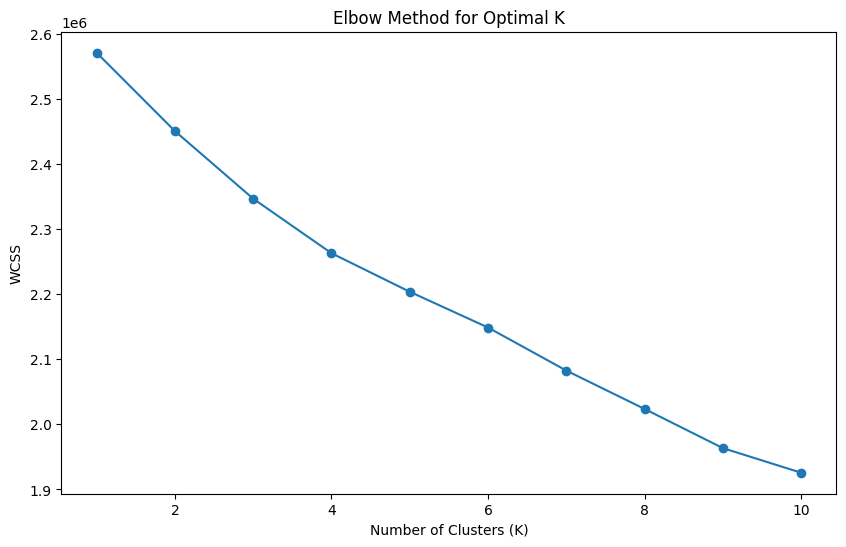

In [13]:

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [14]:
# Silhouette Score Method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
    cluster_labels = kmeans.fit_predict(reduced_matrix)
    silhouette_avg = silhouette_score(reduced_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)


In [ ]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Optimal K')
plt.show()

In [ ]:
# Choose the optimal K based on the results
optimal_k = 4  # Example, you should choose based on the plots


In [ ]:
# Step 6: Apply K-Means with the optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Set n_init explicitly
clusters = kmeans.fit_predict(reduced_matrix)


In [ ]:
# Step 7: Add cluster labels to the original data
df_anime_rating_subset['cluster'] = clusters

In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from scipy.sparse import csr_matrix

file_path = '/content/df_anime_rating_subset.csv'

df = pd.read_csv(file_path)

In [3]:
sparse_matrix = csr_matrix(df.drop(['anime_id', 'name', 'user_id'], axis=1).astype(np.float32))

In [4]:
dense_matrix = sparse_matrix.toarray()

In [5]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from scipy.sparse import csr_matrix

# Initialize distances variable
distances = None

# Calculate the cosine distance matrix
try:
    distances = cdist(dense_matrix, dense_matrix, metric='cosine')
except MemoryError:
    print("Error: Not enough memory to calculate distance matrix!")
    exit(1)

if distances is not None:
    print("Cosine distance matrix:\n", distances)
else:
    print("Failed to calculate distance matrix.")

Cosine distance matrix:
 [[2.22044605e-16 2.47716425e-09 1.81193927e-09 ... 3.83187374e-08
  7.83181164e-09 3.57704311e-10]
 [2.47716425e-09 0.00000000e+00 1.63823621e-10 ... 3.67066563e-08
  2.02975614e-09 1.74042092e-09]
 [1.81193927e-09 1.63823621e-10 0.00000000e+00 ... 3.64270131e-08
  2.66880207e-09 1.14793186e-09]
 ...
 [3.83187374e-08 3.67066563e-08 3.64270131e-08 ... 0.00000000e+00
  2.88725616e-08 3.73480804e-08]
 [7.83181164e-09 2.02975614e-09 2.66880207e-09 ... 2.88725616e-08
  0.00000000e+00 6.50007459e-09]
 [3.57704311e-10 1.74042092e-09 1.14793186e-09 ... 3.73480804e-08
  6.50007459e-09 0.00000000e+00]]


In [6]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.spatial import distance

In [7]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist
from scipy.sparse import csr_matrix

file_path = '/content/df_anime_rating_subset.csv'

df = pd.read_csv(file_path)

In [8]:
sparse_matrix = csr_matrix(df.drop(['anime_id', 'name', 'user_id'], axis=1).astype(np.float32))

In [9]:
dense_matrix = sparse_matrix.toarray()

In [11]:
def euclidean_distance(matrix):
    num_rows = matrix.shape[0]
    distances = np.zeros((num_rows, num_rows))
    for i in range(num_rows):
        for j in range(i + 1, num_rows):
            dist = distance.euclidean(matrix[i], matrix[j])
            distances[i, j] = dist
            distances[j, i] = dist
    return distances

In [ ]:
dist_matrix = euclidean_distance(dense_matrix)

print("Sparse matrix (dense format):")
print(dense_matrix)
print("\nEuclidean distance matrix:")
print(dist_matrix)